In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['^', 'o', 'v', 'd', 's'] 

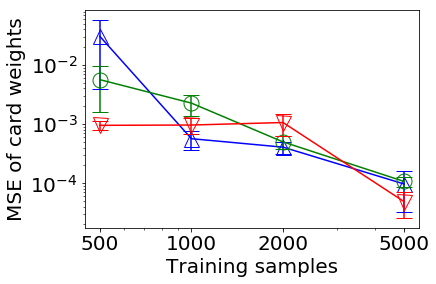

In [3]:
fname_v = './results/onecardpoker/WNHD_size%d_SLOWrmsprop_bsize128/' # <--- Change this if necessary

sizes = [500, 1000, 2000, 5000]
tnames = ['0','1','2']
sample_names = ['0', '1', '2', '3', '4']


nplots=0
for tname in tnames:
    res = []
    for size in sizes:
        sampled_result = []
        for sample_name in sample_names:
            full = os.path.join(fname_v % size, tname + '_' + sample_name) 
            
            try:
                os.listdir(full)
            except:
                print('%s-%s-%s' %(size, tname, sample_name))
                res.append(float('inf'))
                continue
            all_files = [f for f in os.listdir(full) if os.path.isfile(os.path.join(full, f))]
                       
            latest = os.path.join(full, sorted(all_files)[-1])

            with open(latest, 'rb') as f:
                p = pickle.load(f)
                def getstat(p, monitor):
                    mmin = -1
                    return np.mean(p['val_monitor'][monitor][mmin])
 
            # Uncomment the appropriate metric to be plotted
            sampled_result.append(getstat(p, 'vcardprobstrend'))
            # sampled_result.append(getstat(p, 'vcardprobs_joint_KL_trend'))
            # sampled_result.append(getstat(p, 'payofftrend'))
            # sampled_result.append(getstat(p, 'msetrend'))
            
        res.append(tuple(sampled_result))
    
    means = [np.mean(x) for x in res]
    stdevs = [np.std(x) for x in res]
    stderr = [stdevs[i]/np.sqrt(len(res[i])) for i in range(len(res))]
    plt.plot(sizes, means, marker=markers[nplots], color=colors[nplots], markersize=15, markerfacecolor="None")
    
    _,caps,_=plt.errorbar(sizes, means , yerr=stderr,
            fmt='o', ecolor=colors[nplots], capsize=8,markersize=0)

    nplots+= 1
    for cap in caps:
        cap.set_markeredgewidth(1)
    
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xlabel('Training samples', fontsize=20)
plt.ylabel('MSE of card weights', fontsize=20)
plt.xscale('log')
plt.xticks([500, 1000, 2000, 5000],[500, 1000, 2000, 5000])
plt.yscale('log')
plt.title('')
plt.show()
            
    